### deep learning packages

In [1]:
from keras.models import Sequential
from keras.layers import Embedding , LSTM ,Dense, Dropout
from keras.callbacks import EarlyStopping

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

### machine learning packages

In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import re
import pickle
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Load data

In [5]:
train_data = pd.read_csv("train (1).txt" , header =None , sep=';' , names = ['Comment','Emotion'] , encoding = 'utf-8')
train_data['length'] = [len(x) for x in train_data['Comment']]
                         

In [6]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [7]:
train_data.shape

(16000, 3)

In [9]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [10]:
train_data.duplicated().sum()

1

In [11]:
train_data.drop_duplicates(inplace = True)

### EDA

In [13]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

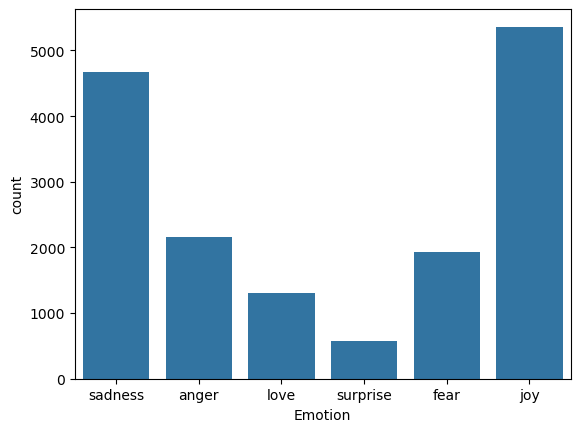

In [79]:
sns.countplot(x = train_data['Emotion'])

In [15]:
df = train_data.copy()

In [16]:
length_values = df['length'].values

In [17]:
length_values

array([ 23, 108,  48, ...,  30,  59,  62], dtype=int64)

<Axes: xlabel='length', ylabel='Count'>

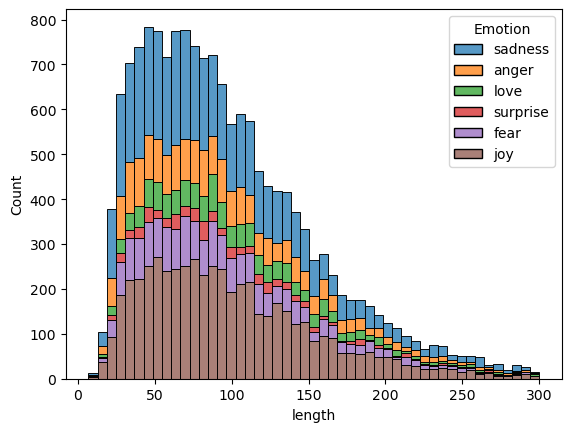

In [18]:
sns.histplot(data = df,x='length',hue='Emotion' , multiple = 'stack')

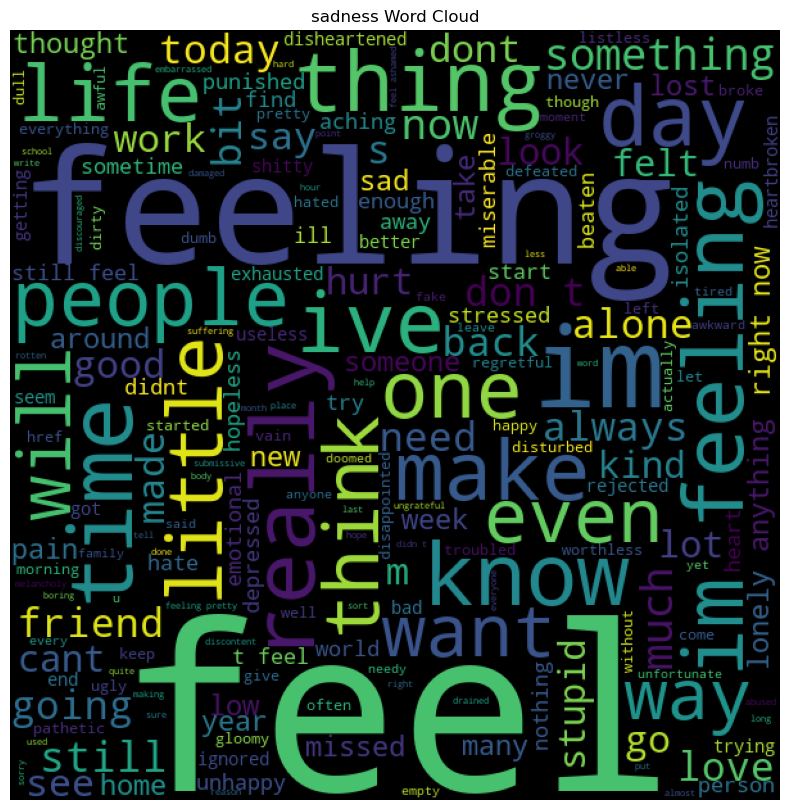

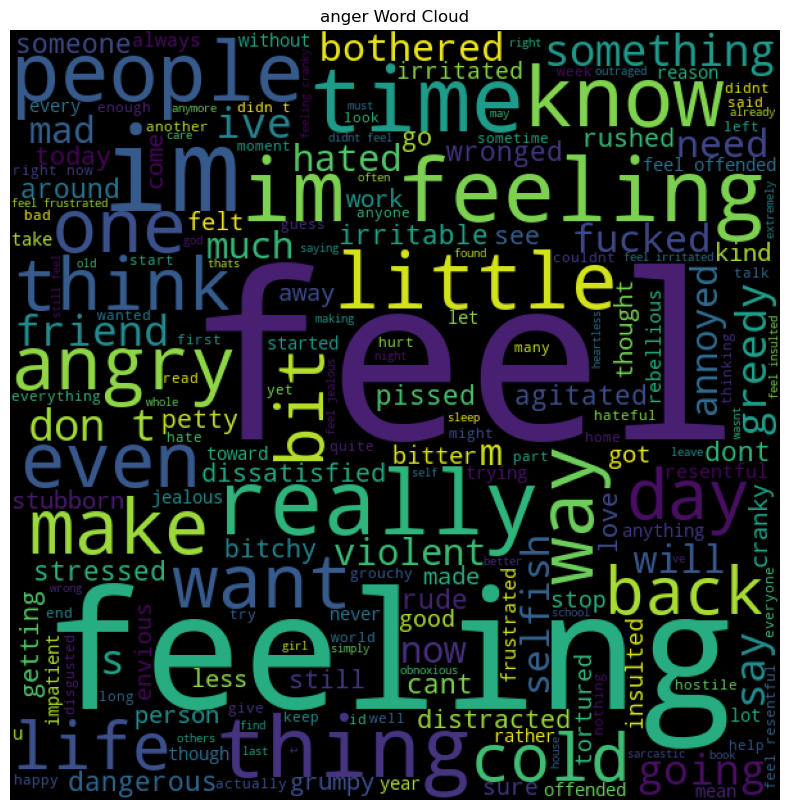

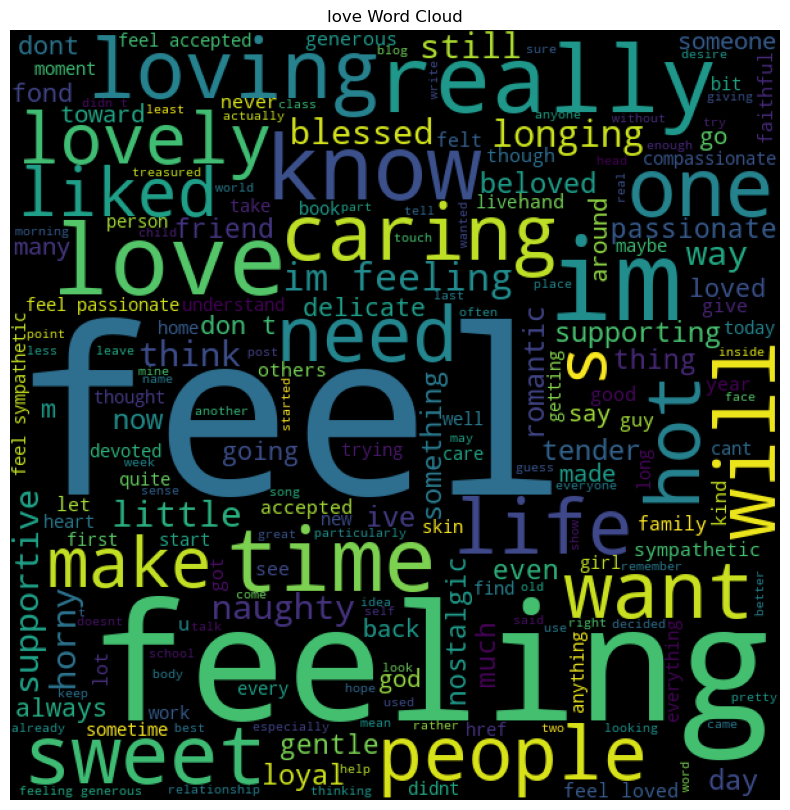

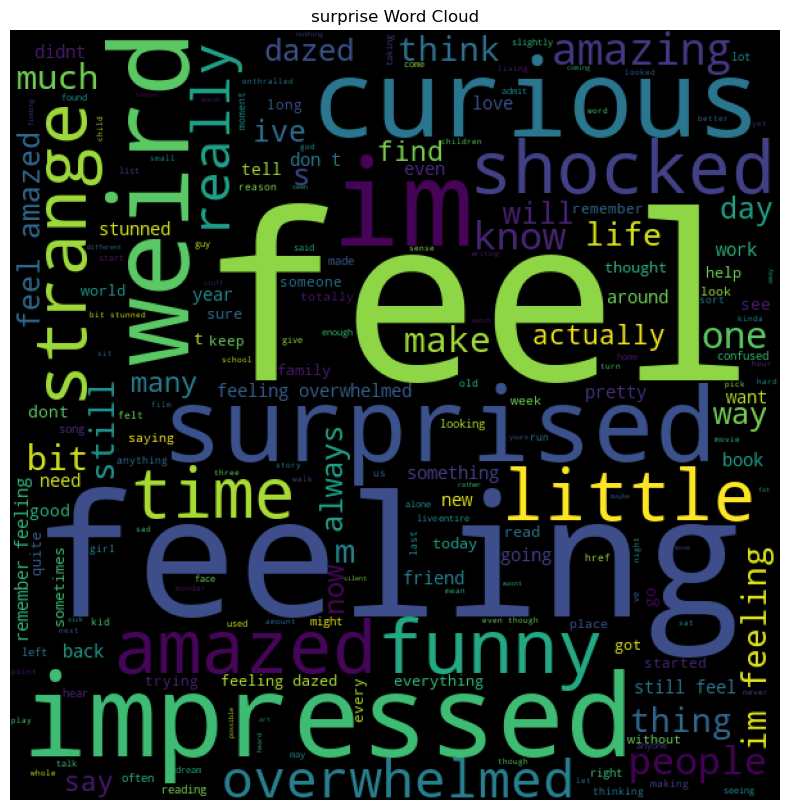

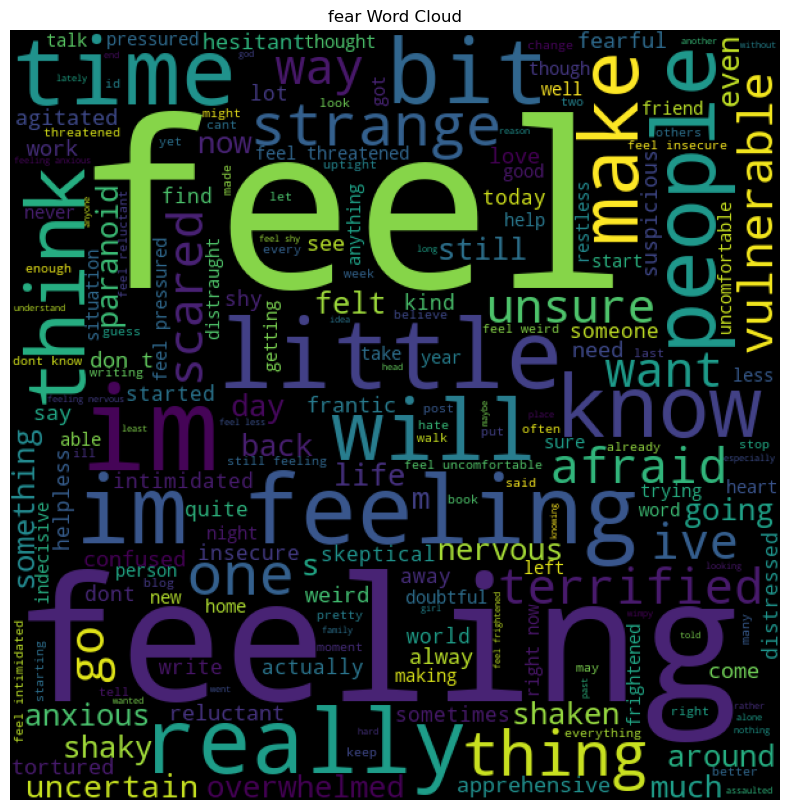

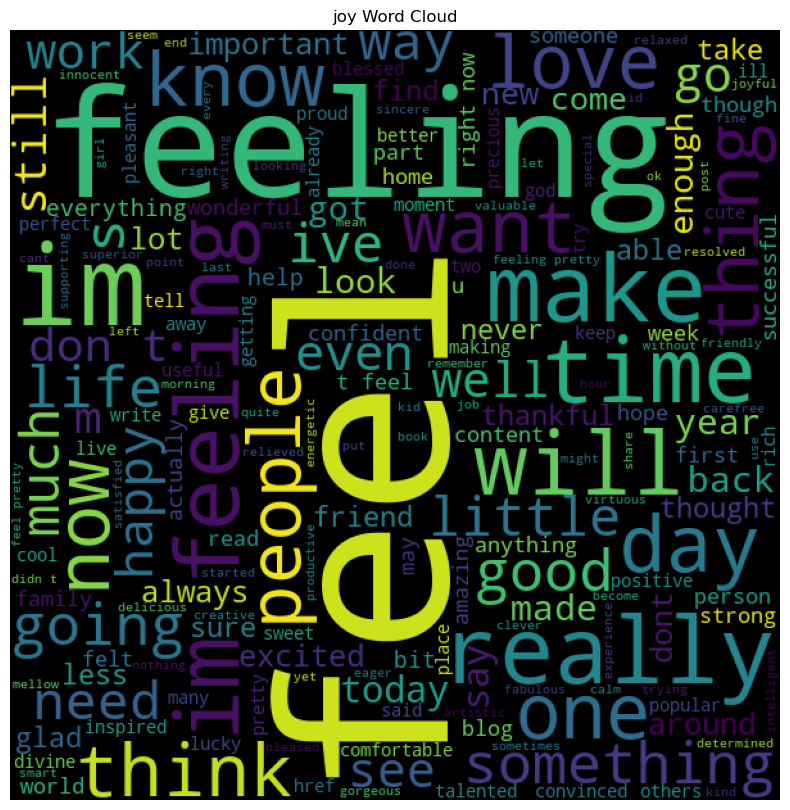

In [19]:
## word cloud for each Emotion
def words_cloud(wordcloud, emotion):
    plt.figure(figsize=(10,10))
    plt.title(f"{emotion} Word Cloud")
    plt.imshow(wordcloud)
    plt.axis("off")
    
emotion_list = train_data['Emotion'].unique()    
for emotion in emotion_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud =  WordCloud(width =600, height=600).generate(text)          
    words_cloud(wordcloud, emotion)
                    
    


### preprocesssing 

In [21]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [22]:
lb = LabelEncoder()

In [69]:
train_data['emotion_encoder'] = lb.fit_transform(train_data['Emotion'])

In [71]:
train_data

NameError: name 'train_data1' is not defined

## Apply ML

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report

In [27]:
df1 = train_data.copy()

In [28]:
df1

,Comment,Emotion,length,emotion_encoder
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [29]:
!pip install nltk

In [30]:
import nltk

In [31]:
## data cleaning
## download nltk stopwords
stopword = set(nltk.corpus.stopwords.words("english"))

def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopword]
    return " ".join(text)



df1['clean_text'] = df1['Comment'].apply(clean_text)

In [32]:
df1

,Comment,Emotion,length,emotion_encoder,clean_text
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [33]:
# train_test split

x_train,x_test,y_train,y_test = train_test_split(df1['clean_text'] ,df1['emotion_encoder'],test_size = 0.2, random_state = 42)

In [34]:
x_train

676      refer cours though cant help feel somehow iron...
14180           would feel awkward someon tell feel toward
7077     feel like probabl would like book littl bit si...
13004    ive slow take time listen child moment feel li...
10264                         feel vital rlsh gimmick need
                               ...                        
13418         love leav reader feel confus slightli deceiv
5390                                            feel delic
860                                start feel littl stress
15796      feel accept music critic reinforc concept music
7270             feel someon rude wrongli done someth lose
Name: clean_text, Length: 12799, dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

x_test_tfidf = tfidf_vectorizer.transform(x_test)
#clf.fit(x_train_tfidf, y_train)
#y_predict_tfidf = clf.predict(x_test_tfidf)

In [40]:
 classifier = {
    " Multinomial naive bayes " : MultinomialNB(),
     "Logistic Regression " : LogisticRegression(),
     "Random Forest Classifier" : RandomForestClassifier(),
     "SVM"                    : SVC() 
 }

for name, clf in classifier.items():
    print(f"\n=============={name}===============")
    clf.fit(x_train_tfidf,y_train)
    y_predict_tfidf = clf.predict(x_test_tfidf)
    print(f"\nAccuracy using TF-IDF : {accuracy_score(y_test,y_predict_tfidf)}")
    print("Classification report :  ")
    print(classification_report(y_test,y_predict_tfidf))


============== Multinomial naive bayes ===============

Accuracy using TF-IDF : 0.6590625
Classification report :  
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


==============Logistic Regression ===============

Accuracy using TF-IDF : 0.825
Classification report :  
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3   

### model selection 

In [57]:
lg = LogisticRegression()
lg.fit(x_train_tfidf,y_train)
y_pred_lg = lg.predict(x_train_tfidf)
y_pred_lg

array([2, 4, 4, ..., 4, 2, 0])

In [59]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])
    
    predicted_label = lg.predict(input_vectorized)[0]
    
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    
    label = np.max(lg.predict(input_vectorized)[0])
    
    return predicted_emotion,label



sentence = ["i didnt feel humiliated",
           "i am feeling grouchy",
           "i feel strong and good overall",
           "im grabbing a minute to post i feel greedy wrong",
           "he hates you"]

for sent in sentence:
    print(sent)
    predicted_emotion,label = predict_emotion(sent)
    print("Predicted emotion :", predicted_emotion)
    print("Predicted label :" , label)
    print("===========================================")

i didnt feel humiliated
Predicted emotion : sadness
Predicted label : 4
i am feeling grouchy
Predicted emotion : anger
Predicted label : 0
i feel strong and good overall
Predicted emotion : joy
Predicted label : 2
im grabbing a minute to post i feel greedy wrong
Predicted emotion : anger
Predicted label : 0
he hates you
Predicted emotion : anger
Predicted label : 0


In [61]:
import pickle
pickle.dump(lg,open("logistic_regression.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))
            

In [51]:
import sklearn
print(sklearn.__version__)

1.6.1


In [123]:
text = " ".join(["i love my self " , "i hate you " , "we love yourself"])
one_hot(input_text = text,n=100)

[56, 28, 12, 37, 56, 85, 12, 82, 28, 14]

## Apply DL using LSTM

## cleaning  , Padding

In [127]:
train_data

,Comment,Emotion,length,emotion_encoder
0,i didnt feel humiliated,4,23,4
1,i can go from feeling so hopeless to so damned...,4,108,4
2,im grabbing a minute to post i feel greedy wrong,0,48,0
3,i am ever feeling nostalgic about the fireplac...,3,92,3
4,i am feeling grouchy,0,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101,4
15996,i am now turning and i feel pathetic that i am...,4,102,4
15997,i feel strong and good overall,2,30,2
15998,i feel like this was such a rude comment and i...,0,59,0


In [129]:
data= train_data.drop(columns = "emotion_encoder")

In [131]:
data

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101
15996,i am now turning and i feel pathetic that i am...,4,102
15997,i feel strong and good overall,2,30
15998,i feel like this was such a rude comment and i...,0,59


In [101]:
stopwords =  set(nltk.corpus.stopwords.words('english'))

## Clean text , Encoding , Padding 

In [147]:
def clean_text(df1,column,vocab_size,max_len):
    stemmer = PorterStemmer()


    corpus = []
    for text in df1[column]:
        text = re.sub("[^a-zA-Z]"," ",text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(w) for w in text if w not in stopwords]
        text = " ".join(text)
        corpus.append(text)
        print(len(corpus))
    one_hot_word = [one_hot(input_text = word , n=vocab_size)for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen = max_len, padding='pre')
    return pad
x_train = clean_text(data,"Comment",vocab_size=11000, max_len=300)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [151]:
x_train.shape

(15999, 300)

In [153]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(data['Emotion'])

In [155]:
y_train = to_categorical(train_data['Emotion'])
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [157]:
y_train.shape

(15999, 6)

In [159]:
print(y_train.shape)
print(y_train[:5])


(15999, 6)
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


## MODEL BUILDING AND TRAINING

In [166]:
model = Sequential()
vocab_size = np.max(x_train) + 1  # Get actual vocab size
model.add(Embedding(input_dim=vocab_size, output_dim=150))


model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5 , batch_size=64 , verbose=1)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 127s 478ms/step - accuracy: 0.3803 - loss: 1.5276
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 478ms/step - accuracy: 0.8337 - loss: 0.4957
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 479ms/step - accuracy: 0.9187 - loss: 0.2356
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 488ms/step - accuracy: 0.9373 - loss: 0.1740
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 123s 491ms/step - accuracy: 0.9470 - loss: 0.1455


# Predictive System 

In [181]:
def pred(text):
        stemmer = PorterStemmer()
        corpus = []
        text = re.sub("[^a-zA-Z]"," ",text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(w) for w in text if w not in stopwords]
        text = " ".join(text)
        corpus.append(text)
        print(len(corpus))
        one_hot_word = [one_hot(input_text = word , n=vocab_size)for word in corpus]
        pad = pad_sequences(sequences=one_hot_word,maxlen = 300, padding='pre')
        return pad
    
sentences = [
    'I hates apples',
    'I feel good today',
]

for sent in sentences:
    clean_sent= pred(sent)
    emotion = lb.inverse_transform(np.argmax(model.predict(clean_sent),axis= -1))[0]
    label = np.max(model.predict(clean_sent))
    
    print(emotion)
    print(label)
    print("==========================================")


1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0
0.8235911
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2
0.9991678


In [185]:
model.save('model.h5')